In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from math import floor
import seaborn as sns
import os 
from PIL import Image as PImage

from google.colab import drive
drive.mount('/content/gdrive')

np.random.seed(9001)
#WHAT!? 9000!?!?

Mounted at /content/gdrive


In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/W_train.csv')

In [ ]:
df.shape

(421570, 7)

In [ ]:
len(pd.unique(df.Date))
  

143

In [ ]:
df.head()

,Unnamed: 0,index,Store,Dept,Date,Weekly_Sales,IsHoliday
0,0,0,1,1,2010-02-05,24924.50,0
1,1,1,1,1,2010-02-12,46039.49,1
2,2,2,1,1,2010-02-19,41595.55,0
3,3,3,1,1,2010-02-26,19403.54,0
4,4,4,1,1,2010-03-05,21827.90,0


In [ ]:
max(df.Store)

45

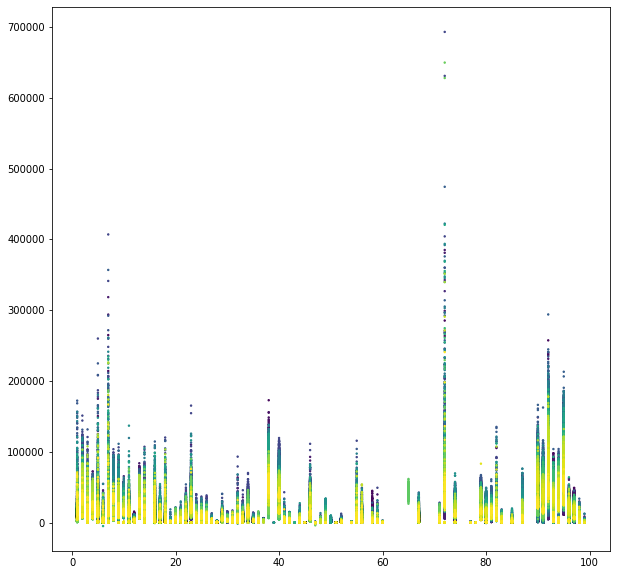

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(df.Dept, df.Weekly_Sales, c = df.Store, s = 2)

In [ ]:
# plt.figure(figsize=(10,10))
# sns.countplot(x = df.Weekly_Sales, data = df.Dept )
# plt.show()

In [ ]:
dept_1 = df['Dept'].loc[df['Dept'] == 1]


In [ ]:
def dept(i):
  dept_i = df['Dept'].loc[df['Dept'] == i]
  return dept_i


In [ ]:
sales_1 = df.loc[df['Dept'] == , 'Weekly_Sales']

In [ ]:
def sales_i(i):
  sales_i = df.loc[df['Dept'] == i, 'Weekly_Sales']
  return sales_i


In [ ]:
sales_i(1).sum()

123638776.53999999

In [ ]:
sales_sum = []
for i in range(1,99):
  sales_sum.append(sales_i(i).sum())


In [ ]:
inx = []
for i in range(1,99):
  inx.append(i)

In [ ]:

data = [inx, sales_sum]

In [ ]:
# df1 = DataFrame (data,columns=['Dept', 'Total_Sales'])
df1 = pd.DataFrame({'Dept':inx, 'Total_Sales':sales_sum})


In [ ]:
df1.head()

,Dept,Total_Sales
0,1,1.236388e+08
1,2,2.806112e+08
2,3,7.589245e+07
3,4,1.671467e+08
4,5,1.356074e+08


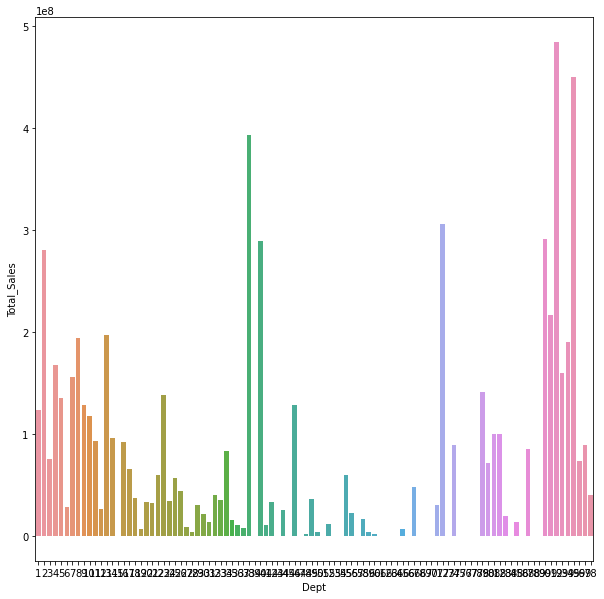

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x = df1.Dept, y = df1.Total_Sales)
plt.show()

In [ ]:
unique_col = df['Date'].unique().tolist()

In [ ]:
df.dtypes

Unnamed: 0        int64
index             int64
Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday         int64
dtype: object

In [ ]:
unique_col

In [ ]:
len(unique_col)

In [ ]:
unique_col

In [ ]:
maxi = []
for x in unique_col:
  cat = df.loc[df['Date'] == x, 'Weekly_Sales']
  maxi.append(cat.max())  


In [ ]:
mini = []
for x in unique_col:
  cat = df.loc[df['Date'] == x, 'Weekly_Sales']
  mini.append(cat.min())  

In [ ]:
df_maxmin = pd.DataFrame({'Unique_Dates':unique_col, 'Min':mini, 'Max': maxi })


In [ ]:
df_maxmin.head()

,Unique_Dates,Min,Max
0,2010-02-05,-59.00,293966.05
1,2010-02-12,-50.97,202622.42
2,2010-02-19,-863.00,192282.19
3,2010-02-26,-1750.00,205250.96
4,2010-03-05,-798.00,214383.07


In [ ]:
!pip install chart_studio


     |████████████████████████████████| 71kB 4.5MB/s 


In [ ]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly.offline import plot
init_notebook_mode(connected=True)
import chart_studio.plotly.plotly as py
import plotly
import pandas as pd
import datetime


df_maxmin['Unique_Dates'] = df_maxmin['Unique_Dates'].astype('str') 
df_maxmin['Max'] = df_maxmin['Max'].astype('double')
df_maxmin['Min'] = df_maxmin['Min'].astype('double') 

date2 = []
for i in df_maxmin['Unique_Dates']:
    new_date = datetime.datetime.strptime(i, "%Y-%m-%d").strftime("%Y-%m-%d")
    date2.append(new_date)
    
df_maxmin['Unique_Dates'] = df_maxmin['Unique_Dates'].str.replace('/', '-')
df_maxmin['Unique_Dates'] = date2
# df.fillna(0)
# df.head()

In [ ]:

trace_high = go.Scatter(
    x=df_maxmin['Unique_Dates'],
    y=df_maxmin['Max'],
    name = "Wally High",
    line = dict(color = '#17BECF'),
    opacity = 0.8)

trace_low = go.Scatter(
    x=df_maxmin['Unique_Dates'],
    y=df_maxmin['Min'],
    name = "Wally Low",
    line = dict(color = 'red'),
    opacity = 0.8)

data = [trace_high,trace_low]

layout = dict(
    title='Time Series with Rangeslider',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = dict(data=data, layout=layout)
# iplot(fig, filename = "Time Series with Rangeslider")

# plotly.offline.plot(fig, filename='Plotly_Stock.html')
plot(fig)

'temp-plot.html'

In [ ]:
plotly.version

<module 'plotly.version' from '/usr/local/lib/python3.7/dist-packages/plotly/version.py'>

In [ ]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime


fig = go.Figure(data=[go.Candlestick(x=df_maxmin['Unique_Dates'],
                
                high=df_maxmin['Max'],
                low=df_maxmin['Min']
                )])
# open=df_maxmin['AAPL.Open'],
# close=df_maxmin['AAPL.Close']
plot(fig)

'temp-plot.html'

In [ ]:
 d1 = df.loc[df['Weekly_Sales'] == 293966.05, 'Date']

In [ ]:
d1

In [ ]:
date1 = df.loc[df['Date'] == '2010-02-12', 'Weekly_Sales']

In [ ]:
date1.max()

202622.42

In [ ]:
df9.head()

,date1
137,19251.50
280,43541.07
423,13403.63
566,34507.34
709,25798.78


In [ ]:
max(df9['date1'])

TypeError: ignored

In [ ]:
date1.shape

(2959,)

In [ ]:
sales_1 = df.loc[df['Dept'] == , 'Weekly_Sales']

In [ ]:
min(df.Dept)

1

In [ ]:
sales_i(3)

286       13740.12
287       10887.84
288       11523.47
289       11135.17
290       12275.58
            ...   
412357     7657.71
412358     7731.70
412359     6880.10
412360     6352.19
412361     6726.03
Name: Weekly_Sales, Length: 6435, dtype: float64

In [ ]:
dept(99)

10207     99
10208     99
10209     99
10210     99
10211     99
          ..
404761    99
404762    99
404763    99
411931    99
411932    99
Name: Dept, Length: 862, dtype: int64

In [ ]:
dept_1.shape

(6435,)

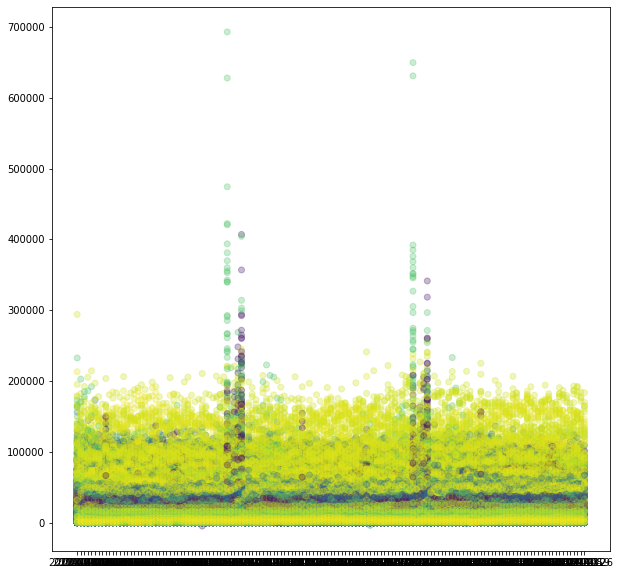

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(df.Date, df.Weekly_Sales, c = df.Dept, alpha = 0.3)

In [ ]:
df['Dept'].describe()

count    421570.000000
mean         44.260317
std          30.492054
min           1.000000
25%          18.000000
50%          37.000000
75%          74.000000
max          99.000000
Name: Dept, dtype: float64

In [ ]:
print(df['Weekly_Sales'].describe())

count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64


Replace observations with negative Weekly Sales with the mean

In [ ]:
print(df.shape)
'''Gather negative observations'''
neg=df.loc[df['Weekly_Sales']<0]
i=0

while(i<len(neg)):
    row=neg.iloc[i]
    #key 0 retrieves index value
    ind=row.get(key=0)
    df.at[ind,'Weekly_Sales']=df['Weekly_Sales'].mean()
    i+=1
print(df.iloc[846]) 
#1285 observations altered

(421570, 7)
Unnamed: 0             846
index                  846
Store                    1
Dept                     6
Date            2012-08-10
Weekly_Sales       15981.3
IsHoliday                0
Name: 846, dtype: object


In [ ]:
print(df['Weekly_Sales'].describe())

count    421570.000000
mean      16030.254816
std       22693.833976
min           0.000000
25%        2130.877500
50%        7709.810000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64


Windsorizing Weekly Sales

In [ ]:
class Winsorizer():
  def __init__(self, df):
    self.upper = df.quantile(0.95)
    self.lower = df.quantile(0.05)
    self.df = df
  def _transformer_up(self, x):
    if x > self.upper:
      return self.upper
    else:
      return x
  def _transformer_down(self, x):
    if x < self.lower:
      return self.lower
    else:
      return x
  def transform(self):
    self.df = self.df.apply(self._transformer_up)
    self.df = self.df.apply(self._transformer_down)
    return self.df


In [ ]:
print(df.shape)
wind=Winsorizer(df['Weekly_Sales'])
df['Weekly_Sales']=wind.transform()
print(df.shape)

(420285, 7)
(420285, 7)


Code to trim the top and bottom 5% of data:

In [ ]:
'''print(df.shape)
df["Weekly_Sales"] = pd.to_numeric(df["Weekly_Sales"])

ws=df['Weekly_Sales']
sort=sorted(ws)
t5=floor(len(ws)*.95)
b5=floor(len(ws)*.05)
top=sort[t5:]
bottom=sort[:b5+1]
fat=[]
for i in bottom:
    fat.append(i)
for i in top:
    fat.append(i)
for i in fat:
    ind=df[df['Weekly_Sales'] == i].index.values
    df=df.drop(ind)
print(df.shape)'''

'print(df.shape)\ndf["Weekly_Sales"] = pd.to_numeric(df["Weekly_Sales"])\n\nws=df[\'Weekly_Sales\']\nsort=sorted(ws)\nt5=floor(len(ws)*.95)\nb5=floor(len(ws)*.05)\ntop=sort[t5:]\nbottom=sort[:b5+1]\nfat=[]\nfor i in bottom:\n    fat.append(i)\nfor i in top:\n    fat.append(i)\nfor i in fat:\n    ind=df[df[\'Weekly_Sales\'] == i].index.values\n    df=df.drop(ind)\nprint(df.shape)'

(array([4.04629e+05, 1.39750e+04, 1.55600e+03, 8.20000e+01, 1.90000e+01,
        1.70000e+01, 3.00000e+00, 0.00000e+00, 0.00000e+00, 4.00000e+00]),
 array([     0.   ,  69309.936, 138619.872, 207929.808, 277239.744,
        346549.68 , 415859.616, 485169.552, 554479.488, 623789.424,
        693099.36 ]),
 <a list of 10 Patch objects>)

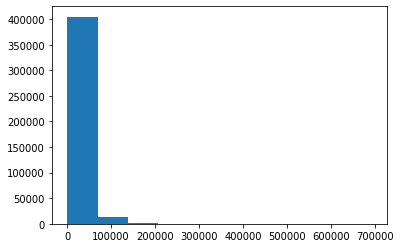

In [ ]:
plt.hist(df['Weekly_Sales'])

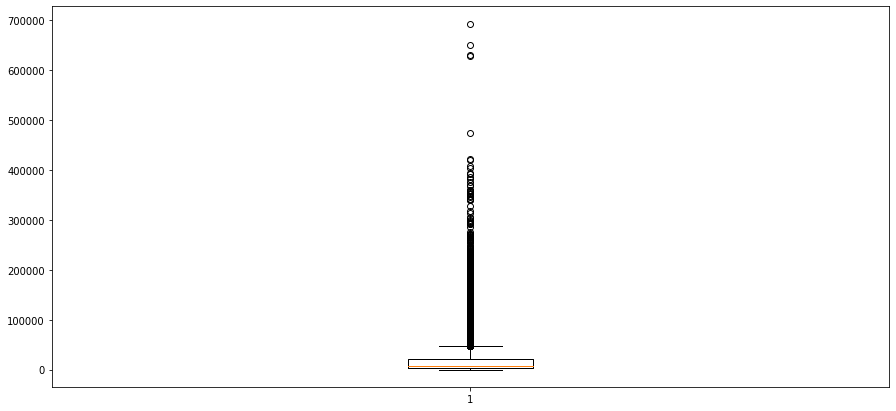

In [ ]:
plt.figure(figsize =(15, 7))
plt.boxplot(df['Weekly_Sales'])
plt.show()

In [ ]:
df['Weekly_Sales_log']=df['Weekly_Sales'].apply(lambda x:np.log(x))

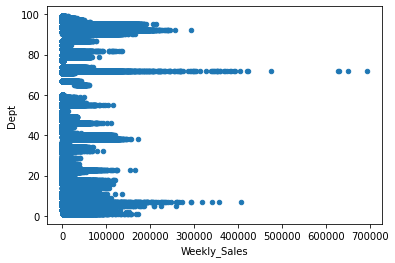

In [ ]:
df.plot.scatter(x= 'Weekly_Sales', y= 'Dept')

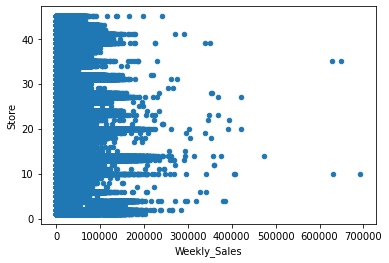

In [ ]:
df.plot.scatter(x= 'Weekly_Sales', y= 'Store')

In [ ]:
df['Weekly_Sales_log'].describe()

KeyError: ignored

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
df['Weekly_Sales_log'].describe()

count    4.202850e+05
mean             -inf
std               NaN
min              -inf
25%      7.658020e+00
50%      8.943648e+00
75%      9.916817e+00
max      1.344893e+01
Name: Weekly_Sales_log, dtype: float64

In [ ]:
#plt.hist(df['Weekly_Sales'])

In [ ]:
df.Weekly_Sales.describe().loc["mean",]

0.030038226149195067

In [ ]:
def minMax(col):
  min = df[col].min()
  max = df[col].max()
  return (df[col] - min) / (max - min)

In [ ]:
df["minMax_WeeklySales"] = minMax("Weekly_Sales")

In [ ]:
df['minMax_WeeklySales'].describe()

count    421570.000000
mean          0.030038
std           0.032534
min           0.000000
25%           0.010126
50%           0.018051
75%           0.036091
max           1.000000
Name: minMax_WeeklySales, dtype: float64

(array([4.03124e+05, 1.65700e+04, 1.72700e+03, 1.05000e+02, 1.90000e+01,
        1.80000e+01, 3.00000e+00, 0.00000e+00, 0.00000e+00, 4.00000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

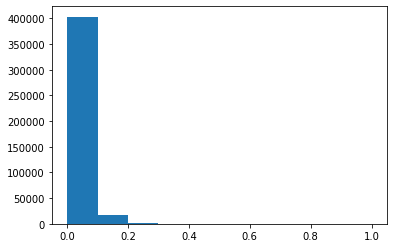

In [ ]:
plt.hist(df['minMax_WeeklySales'])